## Sckitlearn

지도 학습 : 정답 ㅇ 

- 회귀(횟수, 숫자) / 분류(주어진 데이터가 숫자가 아닐때)


비지도 학습 : 정답 X 유의미한 패턴 / 구조 발견 (군집분석)

강화 학습 : 행동에 대한 보상을 통해 누적 보상을 최대로 하는 의사 결정

X : 독립변수(원인) / Y : 종속변수(결과)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [3]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [4]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 선형 회귀(일차 함수)

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [7]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [8]:
X = dataset.iloc[:,:-1].values # 처음부터 마지막 컬럼 직전까지의 데이터 (독립변수 - 원인)

In [9]:
Y = dataset.iloc[:,-1].values # 마지막 컬럼 데이터 (종속변수 - 결과)

In [10]:
X,Y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성
reg.fit(X,Y) # 학습 후 모델 생성

LinearRegression()

In [12]:
Y_pred = reg.predict(X) # X에 대한 예측 값
Y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

* 선형 회귀의 데이터 시각화

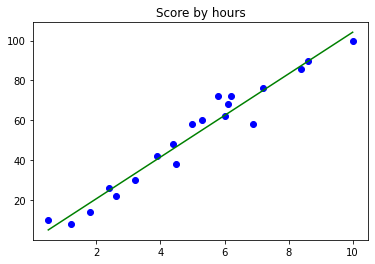

In [13]:
plt.scatter(X,Y, color = "blue") # 산점도
plt.plot(X,Y_pred, color = "green") # 선 그래프
plt.title("Score by hours")
plt.show()

In [14]:
print("9시간 공부했을 때 예상 점수 : ", reg.predict([[9]])) # array함수 > [[]]

9시간 공부했을 때 예상 점수 :  [93.77478776]


In [15]:
reg.coef_ # 기울기

array([10.44369694])

In [16]:
reg.intercept_ # Y 절편

-0.218484702867201

* 데이터 세트 분리

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [19]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) # 훈련 : 80 / 테스트 : 20

In [21]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]), 16)

In [22]:
Y_train, len(Y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]), 16)

* 분리된 데이터를 통한 모델링

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [24]:
reg.fit(X_train, Y_train)

LinearRegression()

* 데이터 시각화 (훈련 세트)

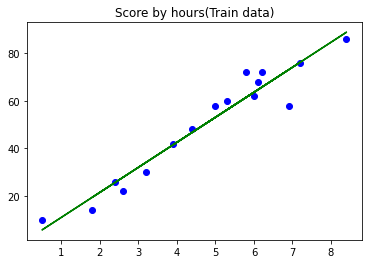

In [25]:
plt.scatter(X_train,Y_train, color = "blue") # 산점도
plt.plot(X_train,reg.predict(X_train), color = "green") # 선 그래프
plt.title("Score by hours(Train data)")
plt.show()

* 데이터 시각화(테스트 세트)

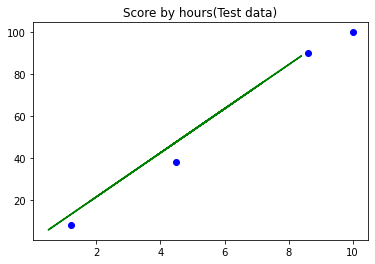

In [26]:
plt.scatter(X_test,Y_test, color = "blue") # 산점도
plt.plot(X_train,reg.predict(X_train), color = "green") # 선 그래프
plt.title("Score by hours(Test data)")
plt.show()

* 모델 평가

In [27]:
reg.score(X_test,Y_test) # 테스크 세트를 통한 모델 평가

0.9727616474310156

### 경사 하강법
* 실제 값과 예측 값 차이의 제곱의 합을 최소화 (RSS)
* 최소제곱법 OLS : 노이즈에 취약하다
* Epoch : 전체 데이터를 모두 사용하는 것

### 확률적 경사 하강법
* 매 단계마다 하나의 데이터 선택해서 경사를 내려감

In [28]:
from sklearn.linear_model import SGDRegressor # SGD : Stochastic Gradient Descent 확률적 경사 하강법
sr = SGDRegressor(max_iter=1000, eta0 = 0.01, verbose = 1) # max_iter : 훈련세트 반복 횟수(Epoch 횟수), eta0 : 학습률
sr = SGDRegressor()
sr.fit(X_train, Y_train)

SGDRegressor()

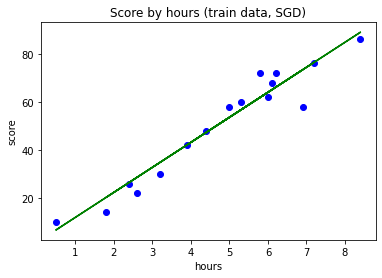

In [29]:
plt.scatter(X_train, Y_train, color='blue') # 산점도
plt.plot(X_train, sr.predict(X_train), color='green') # 선 그래프
plt.title('Score by hours (train data, SGD)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

In [30]:
sr.coef_, sr.intercept_
# 주의 : SGDRegressor() 객체를 생성할 때 random_state 값을 지정하지 않았으므로 결과가 다르게 나타날 수 있습니다

(array([10.40769645]), array([1.53774262]))

In [31]:
sr.score(X_test, Y_test) # 테스트 세트를 통한 모델 평가 

0.9689434562832219

In [32]:
sr.score(X_train, Y_train) # 훈련 세트를 통한 모델 평가 

0.9350705451290087

## 다중 선형 회귀(일차 함수)


### One Hot Encoding
* 내가 표현하고 싶은 값 : 1 / 다른 값은 : 0
* 컬럼을 추가

다중 공산성 : 독립 변수들 간에 서로 강한 상관관계를 가지면서 회귀계수 추정의 오류가 나타나는 문제

* 해결 방법 : Dommy Column이 n개면 n-1개만 사용 ( 1 0 / 0 1 / 0 0)

In [33]:
import pandas as pd

In [34]:
dataset = pd.read_csv('MultipleLinearRegressionData.csv')
X = dataset.iloc[:, :-1].values # 처음부터 마지막 열 전까지
y = dataset.iloc[:, -1].values # 마지막 열

In [35]:
# 다중 선형회귀 만들기
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), [2])], remainder='passthrough') # 2에 해당하는 컬럼에 적용 / Reminder : 다른 열들은 통과
X = ct.fit_transform(X)
X

# 1 0 : Home
# 0 1 : Library
# 0 0 : Cafe

array([[1.0, 0.0, 0.5, 3],
       [0.0, 1.0, 1.2, 4],
       [0.0, 0.0, 1.8, 2],
       [0.0, 0.0, 2.4, 0],
       [1.0, 0.0, 2.6, 2],
       [1.0, 0.0, 3.2, 0],
       [0.0, 1.0, 3.9, 0],
       [0.0, 1.0, 4.4, 0],
       [1.0, 0.0, 4.5, 5],
       [0.0, 0.0, 5.0, 1],
       [0.0, 0.0, 5.3, 2],
       [0.0, 0.0, 5.8, 0],
       [0.0, 1.0, 6.0, 3],
       [0.0, 0.0, 6.1, 1],
       [0.0, 1.0, 6.2, 1],
       [1.0, 0.0, 6.9, 4],
       [0.0, 0.0, 7.2, 2],
       [1.0, 0.0, 8.4, 1],
       [0.0, 1.0, 8.6, 1],
       [0.0, 1.0, 10.0, 0]], dtype=object)

데이터 세트 분리

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

학습

In [37]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

예측 값과 실제 값 비교

In [38]:
# 예측 값
y_pred = reg.predict(X_test)
y_pred 

array([ 92.15457859,  10.23753043, 108.36245302,  38.14675204])

In [39]:
# 실제 값
y_test

array([ 90,   8, 100,  38])

In [40]:
# 공부장소 및 결석에 대한 분석 집 / 도서관 / 카페 / 결석
# 한시간당 영향을 주는 것
reg.coef_ 

array([-5.82712824, -1.04450647, 10.40419528, -1.64200104])

In [41]:
reg.intercept_

5.365006706544776

모델 평가

In [42]:
reg.score(X_train, y_train) # 훈련 세트

0.9623352565265527

In [43]:
reg.score(X_test, y_test) # 테스트 세트(R2 Score와 같은 값)

0.9859956178877446

* 모델 평가
1. MAE (Mean Absolute Error) : (실제 값과 예측 값) 차이의 절대값
2. MSE (Mean Squared Error) : 차이의 제곱
3. RMSE (Root Mean Squared Error) : 차이의 제곱에 루트
4. R^2 : 결정 계수

> R^2 는 1에 가까울수록, 나머지는 0에 가까울수록 좋음

In [44]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred) # 실제 값, 예측 값 # MAE

3.2253285188288

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred) # MSE

19.900226981514916

In [46]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False) # RMSE : Squared=False(제곱 X)

4.460967045553566

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) # R2

0.9859956178877446

### 다항 선형 회귀 (다차 함수)
* 과대적합
* 과소적합

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
dataset = pd.read_csv('PolynomialRegressionData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

1. 단순 선형회귀

In [50]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y) # 전체 데이터로 학습

LinearRegression()

1-1 시각화

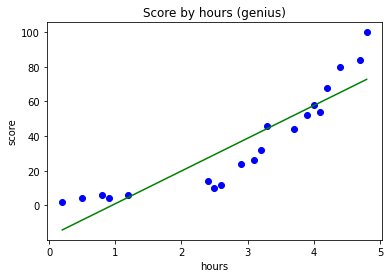

In [51]:
plt.scatter(X, y, color='blue') # 산점도
plt.plot(X, reg.predict(X), color='green') # 선 그래프
plt.title('Score by hours (genius)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

In [52]:
reg.score(X, y) # 전체 데이터를 통한 모델 평가

0.8169296513411765

2. 다항 회귀

In [53]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2) # 2차
X_poly = poly_reg.fit_transform(X)
X_poly[:5] # [x] -> [x^0, x^1, x^2] -> x 가 3이라면 [1, 3, 9] 으로 변환

array([[1.  , 0.2 , 0.04],
       [1.  , 0.5 , 0.25],
       [1.  , 0.8 , 0.64],
       [1.  , 0.9 , 0.81],
       [1.  , 1.2 , 1.44]])

In [54]:
poly_reg.get_feature_names_out() # X의 차수 확인

array(['1', 'x0', 'x0^2'], dtype=object)

In [55]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [56]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y) # 변환된 X 와 y 를 가지고 모델 생성 (학습)

LinearRegression()

2-1 시각화

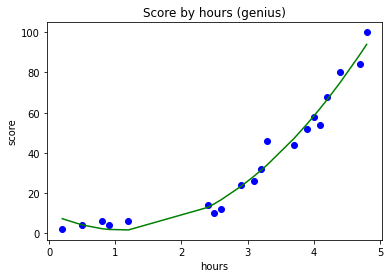

In [57]:
plt.scatter(X, y, color='blue')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color='green')
plt.title('Score by hours (genius)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

In [58]:
X_range = np.arange(min(X), max(X), 0.1) # X 의 최소값에서 최대값까지의 범위를 0.1 단위로 잘라서 데이터를 생성
X_range

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [59]:
X_range.shape # 1차

(46,)

In [60]:
X[:5] # 2차

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [61]:
X_range = X_range.reshape(-1, 1) # row 개수는 자동으로 계산, column 개수는 1개
X_range.shape

(46, 1)

In [62]:
X_range[:5]

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

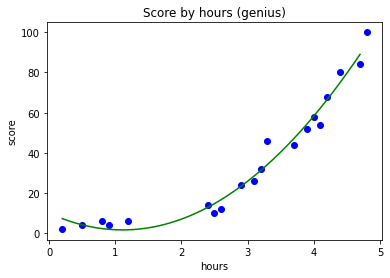

In [63]:
plt.scatter(X, y, color='blue')
plt.plot(X_range, lin_reg.predict(poly_reg.fit_transform(X_range)), color='green')
plt.title('Score by hours (genius)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

* 공부 시간에 따른 시험 성적 예측

In [64]:
reg.predict([[2]]) # 2시간을 공부했을 때 선형 회귀 모델의 예측

array([19.85348988])

In [65]:
lin_reg.predict(poly_reg.fit_transform([[2]])) # 2시간을 공부했을 때 다항 회귀 모델의 예측 : 'X' 대입 대신 ploy_reg.fit_transform 사용

array([7.05092142])

In [66]:
lin_reg.score(X_poly, y)

0.9755457185555199

## 로지스틱 회귀(Logistic Regression)

* 회귀로 적혀 있어도 0,1로 분류 모델

* 시그모이드 함수

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
dataset = pd.read_csv('LogisticRegressionData.csv')
X = dataset.iloc[:, :-1].values # 처음부터 마지막 열 이전
y = dataset.iloc[:, -1].values # 마지막 열

In [71]:
# 데이터 분리
from sklearn.model_selection import train_test_split # 데이터 4개로 변환
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% : TEST. 20% : TRAIN

In [72]:
# 학습(로지스틱 회귀 모델)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [73]:
# 6시간 공부했을 때 예측
classifier.predict([[6]])
# 결과 1 : 합격할 것으로 예측

array([1])

In [74]:
# 합격할 확률 출력
classifier.predict_proba([[6]]) 
# 불합격 확률 14%, 합격 확률 86%

array([[0.14150735, 0.85849265]])

In [75]:
classifier.predict([[4]])
# 결과 0 : 불합격할 것으로 예측

array([0])

In [76]:
# 합격할 확률 출력
classifier.predict_proba([[4]])
# 불합격 확률 62%, 합격 확률 38%

array([[0.6249966, 0.3750034]])

* 분류 결과 예측(테스트 세트)

In [79]:
y_pred = classifier.predict(X_test)
y_pred # 예측 값
# 합, 불, 합, 합

array([1, 0, 1, 1])

In [80]:
y_test # 실제 값 (테스트 세트)
# 합, 불, 합, 불

array([1, 0, 1, 0])

In [81]:
X_test # 공부 시간 (테스트 세트)

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [82]:
classifier.score(X_test, y_test) # 모델 평가
# 전체 테스트 세트 4개 중에서 분류 예측을 올바로 맞힌 개수 3개 -> 3/4 = 0.75

0.75

* 데이터 시각화(훈련 세트)

In [83]:
X_range = np.arange(min(X), max(X), 0.1) # X 의 최소값에서 최대값까지를 0.1 단위로 잘라서 데이터 생성
X_range

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [84]:
p = 1 / (1 + np.exp(-(classifier.coef_ * X_range + classifier.intercept_))) # y = mx + b
p

array([[0.01035705, 0.01161247, 0.01301807, 0.0145913 , 0.01635149,
        0.01832008, 0.02052073, 0.02297953, 0.02572521, 0.02878929,
        0.03220626, 0.03601375, 0.04025264, 0.04496719, 0.05020505,
        0.05601722, 0.06245802, 0.06958479, 0.07745757, 0.08613861,
        0.09569165, 0.10618106, 0.11767067, 0.13022241, 0.14389468,
        0.15874043, 0.17480509, 0.19212422, 0.2107211 , 0.23060425,
        0.25176509, 0.27417574, 0.29778732, 0.32252874, 0.34830616,
        0.3750034 , 0.40248315, 0.43058927, 0.45914989, 0.48798142,
        0.51689314, 0.54569221, 0.57418876, 0.60220088, 0.6295591 ,
        0.65611024, 0.68172044, 0.70627722, 0.72969059, 0.75189324,
        0.77283994, 0.79250621, 0.81088652, 0.82799203, 0.84384828,
        0.85849265, 0.871972  , 0.88434036, 0.89565683, 0.90598377,
        0.91538521, 0.92392546, 0.93166808, 0.93867499, 0.9450058 ,
        0.95071738, 0.95586346, 0.96049453, 0.96465764, 0.96839647,
        0.97175136, 0.97475939, 0.97745455, 0.97

In [85]:
p.shape

(1, 95)

In [86]:
X_range.shape

(95,)

In [87]:
p = p.reshape(-1) # 1차원 배열 형태로 변경
p.shape

(95,)

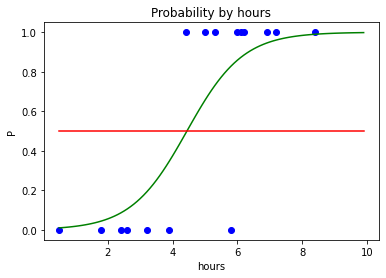

In [88]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red') # X_range 개수만큼 0.5 로 가득찬 배열 만들기
plt.title('Probability by hours')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

* 데이터 시각화(테스트 세트)

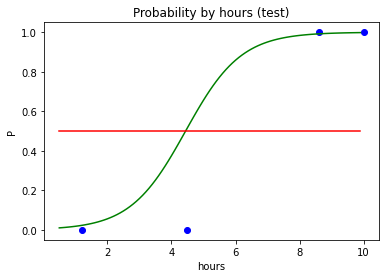

In [89]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red') # X_range 개수만큼 0.5 로 가득찬 배열 만들기
plt.title('Probability by hours (test)')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

In [90]:
classifier.predict_proba([[4.5]]) # 4.5 시간 공부했을 때 확률 (모델에서는 51% 확률로 합격 예측, 실제로는 불합격)

array([[0.48310686, 0.51689314]])

* 혼동 행렬(Confusion Matrix)

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

# TRUE NEGATIVE (TN)       FALSE POSITIVE (FP)
# 불합격일거야 (예측)      합격일거야 (예측)
# 불합격 (실제)             불합격 (실제)

# FALSE NEGATIVE (FN)      TRUE POSITIVE (TP)
# 불합격일거야 (예측)      합격일거야 (예측)
# 합격 (실제)               합격 (실제)

# 뒤에 것부터 해석

array([[1, 1],
       [0, 2]])

## 비지도 학습

* 유사한 특징을 가지는 분류로 군집화

* K-Means
* K개의 클러스터로 군집화 하는 알고리즘 : Centroid(중심)
* 랜덤으로 설정되는 중심점에 영향을 크게 받는다
* K-Means++ : 향상된 K-Means(한점에 대해서 중심점 계산해서 가장 먼 점을 찾는다)
* Elbow Method : K 변화에 따른 중심점까지의 평균 거리 비교

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [93]:
dataset = pd.read_csv('KMeansData.csv')
dataset[:5]

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [95]:
X = dataset.iloc[:, :].values
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

* 데이터 시각화 (전체 데이터 분포)

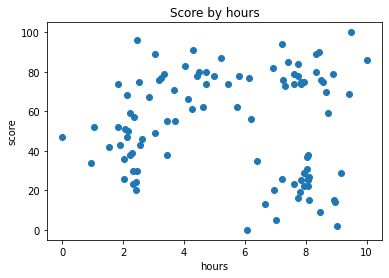

In [96]:
plt.scatter(X[:, 0], X[:, 1]) # x축 : hour, y축 : score
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

* 데이터 시각화 (축 범위 통일)

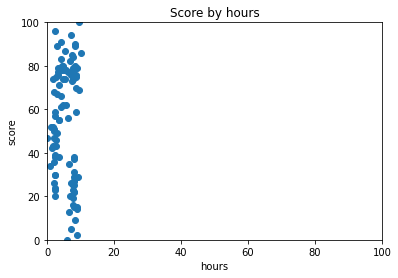

In [97]:
plt.scatter(X[:, 0], X[:, 1]) # x축 : hour, y축 : score
plt.title('Score by hours')
plt.xlabel('hours')
plt.xlim(0, 100)
plt.ylabel('score')
plt.ylim(0, 100)
plt.show()

* 피처 스케일링(Feature Scaling)

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X) # 스케일링 X,Y 범위를 같게 만든다.
X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

* 데이터 시각화 (스케일링된 데이터)

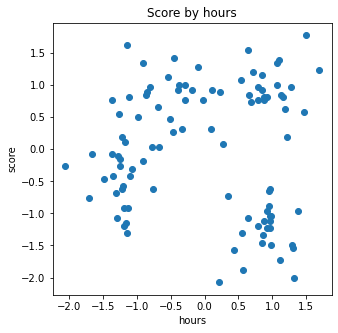

In [99]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

* 최적의 K 값 찾기 (Elbow Method)

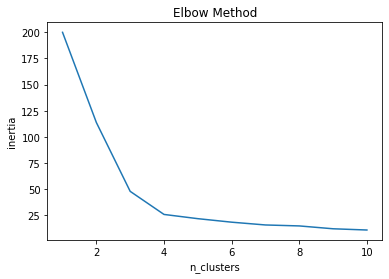

In [100]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 11): # 클러스터 1~10까지
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0) # 방법 : K=means++
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) # 각 지점으로부터 클러스터의 중심(centroid) 까지의 거리의 제곱의 합
    
plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

* 최적의 K = 4
* K-Means 학습

In [101]:
K = 4 # 최적의 K 값

In [102]:
kmeans = KMeans(n_clusters=K, random_state=0)
# kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)

In [103]:
y_kmeans

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3], dtype=int32)

* 데이터 시각화(K = 4)

In [104]:
centers = kmeans.cluster_centers_ # 클러스터의 중심점 (centroid) 좌표
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

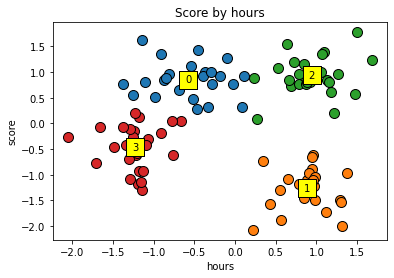

In [106]:
for cluster in range(K):
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s=100, edgecolor='black') # 각 데이터(Cluster값 = 0/1/2/3, 0 : X값 / Cluster값 = 0/1/2/3 , 1 : Y값)
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s=300, edgecolor='black', color='yellow', marker='s') # 중심점 네모
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va='center', ha='center') # 클러스터 텍스트 출력
    
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

* 데이터 시각화 (스케일링 복원)

In [108]:
X_org = sc.inverse_transform(X) # Feature Scaling 된 데이터를 다시 복원
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [109]:
centers_org = sc.inverse_transform(centers) # Cluster(Centers)의 데이터 복원
centers_org

array([[ 3.96458333, 76.08333333],
       [ 7.8552    , 20.96      ],
       [ 8.0084    , 78.2       ],
       [ 2.21269231, 41.76923077]])

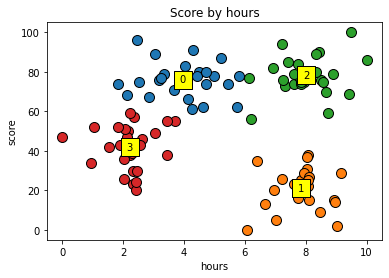

In [110]:
for cluster in range(K):
    plt.scatter(X_org[y_kmeans == cluster, 0], X_org[y_kmeans == cluster, 1], s=100, edgecolor='black') # 각 데이터
    plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s=300, edgecolor='black', color='yellow', marker='s') # 중심점 네모
    plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va='center', ha='center') # 클러스터 텍스트 출력
    
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()